# Newton's Method

## imports
For this project it will be useful to import the numpy and matplotlib libraries.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Deduction and implementation of the algorithm

Let $f$ be a function such that: \begin{cases}
f \in C^2[a, b] \\
f(\lambda) = 0 \text{ , } \lambda \in [a, b] \text{ for some $ a, b \in Dom(f) $.}
\end{cases}

Considering the first degree Taylor polynomial centered at some $ x_0 \in [a, b] $ for  $f$, we have:
\begin{equation}
f(x) = f(x_0) + (x - x_0)f'(x_0) + \frac{(x - x_0)^2}{2}f''(\xi) \text{ , with  } \xi = \xi(x_0)
\end{equation}

If we let $x_0$ be an approximation for $\lambda$ such that $f'(x_0) \neq 0 $ then: 
\begin{equation}
f(\lambda) = f(x_0) + (\lambda - x_0)f'(x_0) + \frac{(\lambda - x_0)^2}{2}f''(\xi) \\
\Rightarrow 0 = f(x_0) + (\lambda - x_0)f'(x_0) + \frac{(\lambda - x_0)^2}{2}f''(\xi) \\
\Rightarrow 0 \approx f(x_0) + (\lambda - x_0)f'(x_0) \\
\Rightarrow -(\lambda - x_0)f'(x_0) \approx f(x_0) \\
\Rightarrow (\lambda - x_0) \approx -\frac{f(x_0)}{f'(x_0)} \\
\therefore \lambda \approx x_0 - \frac{f(x_0)}{f'(x_0)}
\end{equation}

That is, $\exists x_1 \in [a, b] $ such that $ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} $ is a better approximation for $\lambda$

Appling the same method repeatedly ($n$ times), we get $\lambda \approx x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}$.

Assuming the convergence of the sequence $ (x_n)_{n=0}^{\infty} $, we can stop the $n$ iterations once $(x_n - x_{n-1}) < \epsilon $ , for some chosen precision $\epsilon$.

In [2]:
def NewtonMethod(f, f_prime, x_0, a, b, epsilon=10**-4, max_it=100, ylim=10):
    """Finds the root of the real function <f> which is assumed C^2 in some interval closed interval between <a> and <b> containing <x_0> and the root.
    Also prints a simple table of the values for each iteration and plots all the tangents generated by the method.

    Args:
        f : function which root is desired to approximate
        f_prime : derivative of <f>
        x_0 : initial approximation
        [a, b]: endpoints of the interval containing the root
        epsilon : precision
        max_it : maximum number of iterations
        ylim: Oy axis limits in the plot

    Returns:
        x_1 : numerical approximation for the root
    """
    
    # iterations table
    print('%7s %6s %2s %12s' % ('Iteration', 'x', '', 'f(x)'))
    print('%4d %14f %2s %10.15f' % (0, x_0, '', f(x_0)))

    # plotting the iterations
    t = np.linspace(a, b, 301) # 301 points is an arbitrarily large and odd number (this way the plot will be "smooth" and the division by zero will be considered)
    with np.errstate(divide='ignore'):  # ignores (in the graph) possible division problems
        y = f(t)
    plt.plot(t, y)
    plt.plot(t, 0*t, 'k')  # Ox axis
    plt.xlim(a, b)
    plt.ylim(-ylim, ylim)
    plt.grid()


    # algorithm   
    if abs(f(x_0)) < epsilon:
        return x_0  # if the initial approximation is good enough, there's no need for further calculations
        
    for k in range(max_it):
        if ( f_prime(x_0) != 0 ):
            x_1 = x_0 - ( f(x_0) / f_prime(x_0) )
            
            tangent = ( f_prime(x_0) * (t - x_0) ) + f(x_0)
            plt.plot(t, tangent)
            print('%4d %14.7f %2s %10.15f' % (k+1, x_1, '', f(x_1)))
        else:
            print("\n f'(x_%d) = 0 , therefore the method does not converge" % k)
            plt.show()
            return None
        
        if abs(f(x_1)) < epsilon:
            return x_1
        x_0  = x_1
    
    return x_1

## Examples

### #1

The Newton's Method can be easily adapted to solve equations with real roots. 

Let's look at the equation: 
$ \frac{1}{x} = 1+ x^3 $

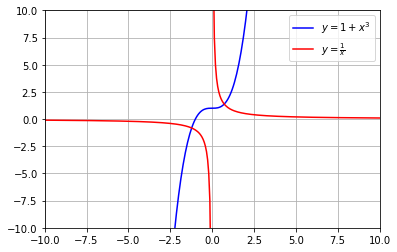

In [3]:
x = np.linspace(-10, 10, 301)  # 301 points is an arbitrarily large and odd number (this way the plot will be "smooth" and the division by zero will be considered)

y_a1 = 1 + x**3

with np.errstate(divide='ignore'):  # ignoring the undefined division
    y_a2 = x**-1

plt.plot(x, y_a1, 'b', label=r'$y = 1 + x^{3}$')
plt.plot(x, y_a2, 'r', label=r'$y = \frac{1}{x}$')
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid()

Since there are two intersections in the graphs of the functions, the equation has two real roots.

For simplicity, let's take a closer look exclusively at the positive one.

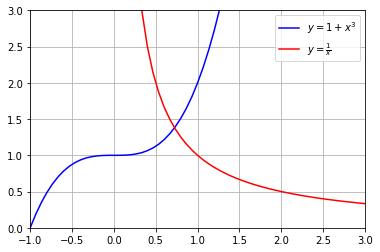

In [4]:
plt.plot(x, y_a1, 'b', label=r'$y = 1 + x^{3}$')
plt.plot(x, y_a2, 'r', label=r'$y = \frac{1}{x}$')
plt.legend()
plt.xlim(-1, 3)
plt.ylim(0, 3)
plt.grid()

From the new plot we can let $[a, b] = [0, 1.5]$

But we should notice that the Newton's Method is applicable to functions, therefore we should write the equation as: 

$ y(x) = 1 + x^3 - \frac{1}{x} $ , for some $x$ such that $y = 0$.

In [5]:
def a(x):
    return 1 + x**3 - x**-1
    
def a_prime(x):
    return 3*(x**2) + x**-2

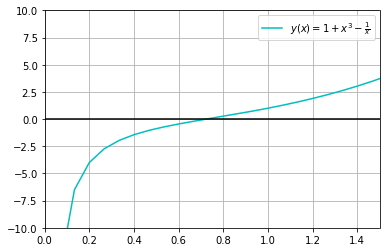

In [6]:
y_a = y_a1 - y_a2
plt.plot(x, y_a, 'c', label=r'$y(x) = 1 + x^{3} - \frac{1}{x}$')
plt.plot(x, 0*x, 'k')
plt.legend()
plt.xlim(0, 1.5)
plt.ylim(-10, 10)
plt.grid()

Iteration      x            f(x)
   0       0.700000    -0.085571428571429
   1      0.7243737    -0.000411681797941
   2      0.7244920    -0.000000006399705

The intersection between the curves (1 + x^3) and (1/x) is, approximately, at x = 0.72449.


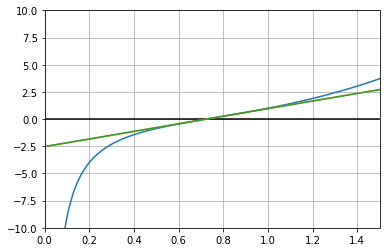

In [7]:
root = NewtonMethod(a, a_prime, 0.7, 0, 1.5, epsilon=10**-5)
print(f"\nThe intersection between the curves (1 + x^3) and (1/x) is, approximately, at x = %.5f." % root)

### #2

Another application of the Newton's Method is to find the reciprocal of number.

$ \pi^{-1} $ , for example, is the zero of the function: $ f(x) = \pi - \frac{1}{x} $

In [8]:
def b(x):
    return np.pi - x**-1

def b_prime(x):
    return x**-2

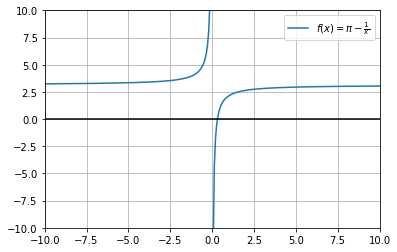

In [9]:
x = np.linspace(-10, 10, 301) # 301 points is an arbitrarily large and odd number (this way the plot will be "smooth" and the division by zero will be considered)

with np.errstate(divide='ignore'):  # ignoring the undefined division
    y_b = np.pi - x**-1


plt.plot(x, y_b, label=r'$f(x) = \pi - \frac{1}{x}$')
plt.plot(x, 0*x, 'k')
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid()

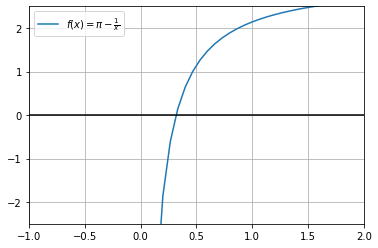

In [10]:
# zooming in
plt.plot(x, y_b, label=r'$f(x) = \pi - \frac{1}{x}$')
plt.plot(x, 0*x, 'k')
plt.legend()
plt.xlim(-1, 2)
plt.ylim(-2.5, 2.5)
plt.grid()

Iteration      x            f(x)
   0       0.500000    1.141592653589793
   1      0.2146018    -1.518199712735694
   2      0.2845209    -0.373087297337715
   3      0.3147231    -0.035803103052753
   4      0.3182695    -0.000398936463064
   5      0.3183099    -0.000000050646252


0.3183098810522526

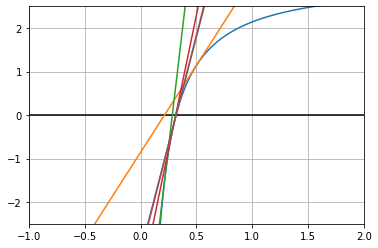

In [11]:
# Let's try to use an initial approximation of x_0 = 0.5

NewtonMethod(b, b_prime, .5, -1, 2, epsilon=10**-7, ylim=2.5)

Iteration      x            f(x)
   0       0.500000    1.141592653589793
   1      0.2146018    -1.518199712735694
   2      0.2845209    -0.373087297337715
   3      0.3147231    -0.035803103052753
   4      0.3182695    -0.000398936463064
   5      0.3183099    -0.000000050646252

 If the initial approximation is x_0 = 0.5, the reciprocal of pi is approximately equal to 0.3183099.


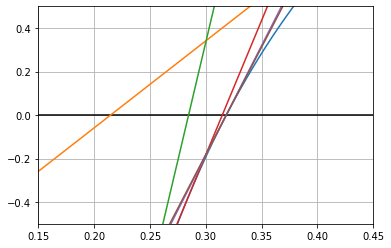

In [12]:
# zooming in
inverse_05 = NewtonMethod(b, b_prime, .5, .15, .45, epsilon=10**-7, ylim=.5)
print(f"\n If the initial approximation is x_0 = 0.5, the reciprocal of pi is approximately equal to %.7f." % inverse_05)

Iteration      x            f(x)
   0       0.700000    1.713021225018365
   1     -0.1393804    10.316202556716672
   2     -0.3397922    6.084567851581637
   3     -1.0423087    4.101001317545634
   4     -5.4976670    3.323487991682621
   5   -105.9479066    3.151031254423792
   6 -35476.1442995    3.141620841545946
   7 -3953943794.4085960    3.141592653842705
   8 -49114627633125392384.0000000    3.141592653589793
   9 -7578296346560044122474436804299911593984.0000000    3.141592653589793
  10 -180423474133395772043820531677420647481561878976611011659389931829419967076368384.0000000    3.141592653589793
  11 -102267103320719337497448069396007723849243691701655921708128976117481770047599270571559507343127859914915668016537330110099506022841618362397443511868486236241920.0000000    3.141592653589793
  12           -inf    3.141592653589793

 f'(x_12) = 0 , therefore the method does not converge


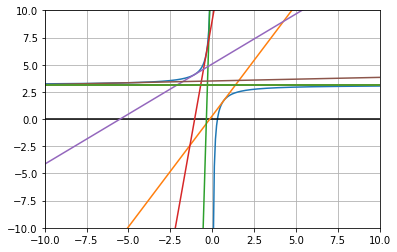

In [13]:
# Now, what happens if we try to use x_0 = 0.7 ?

NewtonMethod(b, b_prime, .7, -10, 10, epsilon=10**-7, max_it=15)

In this example we could experience the sensibility of the Method regarding the initial approximation. That is, $x_0$ must be somewhat good as an approximation for the method to return a reasonable value for the root.

In this case, even though close, $x_0 = 0.5$ and $x_0=0.7$ resulted in completely different outcomes. Using $x_0 = 0.5$ the method was successful. However, with $x_0 = 0.7$, the method diverged.